In [55]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

from common import FIG_WIDTH, figure_save

%matplotlib widget

In [60]:
w = 10e-6
l = 10e-6

cap = w * l * 1.5e-3 + 2*(w + l) * 40e-12

cap

1.516e-13

In [61]:
# Load the data from the csv file
# Line format: c = {c:6e}
caps = []
with open('../simulations/mc_cmim.csv', 'r') as f:
    for line in f:
        if line.startswith('c'):
            c = float(line.split('=')[1].strip())
            caps.append(c)

print(f'Loaded {len(caps)} capacitance values.')

Loaded 2000 capacitance values.


In [62]:
# Calculate statistics
mean_cap = np.mean(caps)
std_cap = np.std(caps)
print(f'Width:   {w:.3e} m')
print(f'Length:  {l:.3e} m')
print(f'Mean:    {mean_cap:.6e} F')
print(f'Std.Dev: {std_cap:.6e} F')
print(f'Error:   {std_cap / mean_cap:.2%}')

Width:   1.000e-05 m
Length:  1.000e-05 m
Mean:    1.518180e-13 F
Std.Dev: 5.003159e-15 F
Error:   3.30%


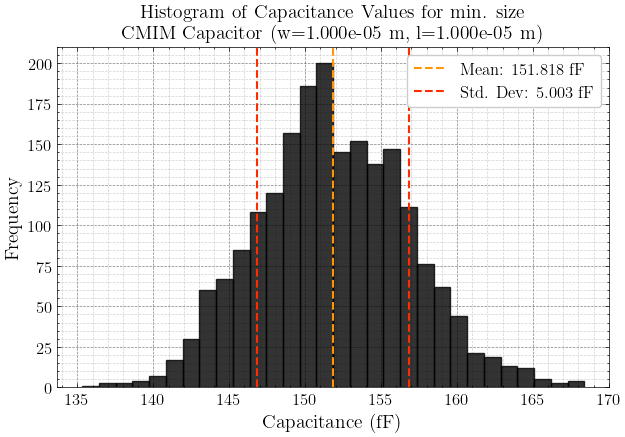

In [63]:
plt.style.use(["science", "grid"])
plt.style.use({
    'font.size': 14,                   # Slightly larger base font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

plt.figure(figsize=(FIG_WIDTH*0.7, FIG_WIDTH * 0.5))

plt.hist(np.array(caps)*1e15, bins=30, color='black', alpha=0.8, edgecolor='black')
plt.axvline(mean_cap*1e15, color='C2', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_cap*1e15:.3f} fF')
plt.axvline((mean_cap + std_cap)*1e15, color='C3', linestyle='dashed', linewidth=1.5, label=f'Std. Dev: {std_cap*1e15:.3f} fF')
plt.axvline((mean_cap - std_cap)*1e15, color='C3', linestyle='dashed', linewidth=1.5)

plt.title(f'Histogram of Capacitance Values for min. size\nCMIM Capacitor (w={w:.3e} m, l={l:.3e} m)')
plt.xlabel('Capacitance (fF)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True, 'minor', 'both', color='0.65', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), "some_size_cap")